In [3]:
%pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [4]:
import kagglehub

path = kagglehub.dataset_download("chebotinaa/fast-food-marketing-campaign-ab-test")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\bryan\.cache\kagglehub\datasets\chebotinaa\fast-food-marketing-campaign-ab-test\versions\1


In [5]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [6]:
print("Dataset path:", path)
print("Files in dataset folder:", os.listdir(path))

Dataset path: C:\Users\bryan\.cache\kagglehub\datasets\chebotinaa\fast-food-marketing-campaign-ab-test\versions\1
Files in dataset folder: ['WA_Marketing-Campaign.csv']


In [7]:
csv_filepath = os.path.join(path, "WA_Marketing-Campaign.csv")

df = pd.read_csv(csv_filepath)

In [8]:
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [10]:
print(df.isnull().sum())

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64


In [11]:
print(df.describe())

         MarketID  LocationID  AgeOfStore   Promotion        week  \
count  548.000000  548.000000  548.000000  548.000000  548.000000   
mean     5.715328  479.656934    8.503650    2.029197    2.500000   
std      2.877001  287.973679    6.638345    0.810729    1.119055   
min      1.000000    1.000000    1.000000    1.000000    1.000000   
25%      3.000000  216.000000    4.000000    1.000000    1.750000   
50%      6.000000  504.000000    7.000000    2.000000    2.500000   
75%      8.000000  708.000000   12.000000    3.000000    3.250000   
max     10.000000  920.000000   28.000000    3.000000    4.000000   

       SalesInThousands  
count        548.000000  
mean          53.466204  
std           16.755216  
min           17.340000  
25%           42.545000  
50%           50.200000  
75%           60.477500  
max           99.650000  


In [12]:
pd.crosstab(df['Promotion'], df['week'])

week,1,2,3,4
Promotion,,,,
1,43,43,43,43
2,47,47,47,47
3,47,47,47,47


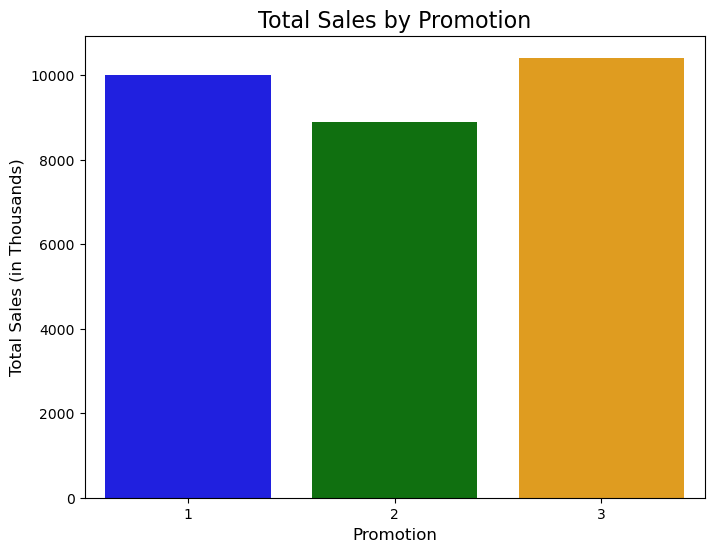

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

#Sum the SalesInThousands by Promotion
sales_by_promotion = df.groupby('Promotion')['SalesInThousands'].sum().reset_index()

#Custom color palette for promotions (keys as strings)
promotion_colors = {'1': 'blue', '2': 'green', '3': 'orange'}

# Convert Promotion column to string for matching the keys in the palette
sales_by_promotion['Promotion'] = sales_by_promotion['Promotion'].astype(str)

#Barplot with summed sales for each promotion and custom colors
plt.figure(figsize=(8, 6))
sns.barplot(x='Promotion', y='SalesInThousands', data=sales_by_promotion, hue='Promotion', palette=promotion_colors, legend=False)
plt.title('Total Sales by Promotion', fontsize=16)
plt.xlabel('Promotion', fontsize=12)
plt.ylabel('Total Sales (in Thousands)', fontsize=12)
plt.show()


In [69]:
sales_by_promotion

,Promotion,SalesInThousands
0,1,9993.03
1,2,8897.93
2,3,10408.52


Unique Promotion Groups: [3 2 1]
F-statistic: 21.953485793080677
P-value: 6.765849261408714e-10
We reject the null hypothesis: There is a significant difference in sales between the three promotion groups.


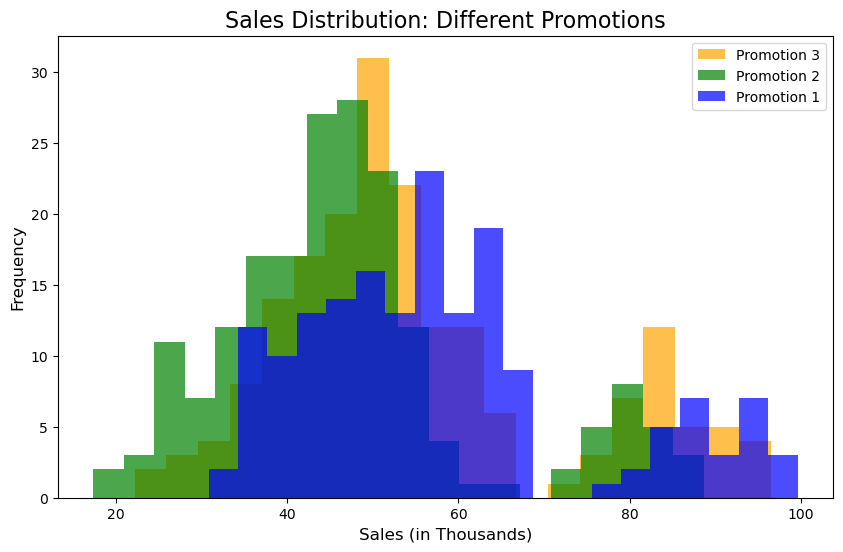

In [71]:
#Split the data based on the 'Promotion' column (1, 2, 3)
promotion_groups = df['Promotion'].unique()
print(f"Unique Promotion Groups: {promotion_groups}")

# Split the sales data by promotion
group_a = df[df['Promotion'] == promotion_groups[0]]['SalesInThousands']
group_b = df[df['Promotion'] == promotion_groups[1]]['SalesInThousands']
group_c = df[df['Promotion'] == promotion_groups[2]]['SalesInThousands']

#Perform ANOVA to compare means across the three groups
f_stat, p_value = stats.f_oneway(group_a, group_b, group_c)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# If the p-value is less than 0.05, the result is deemed statistically significant
if p_value < 0.05:
    print("We reject the null hypothesis: There is a significant difference in sales between the three promotion groups.")
else:
    print("We fail to reject the null hypothesis: There is no significant difference in sales between the three promotion groups.")

# Visualization
# Fix the color mappings: 1 -> Blue, 2 -> Green, 3 -> Orange
promotion_colors = {1: 'blue', 2: 'green', 3: 'orange'}

# Correct histogram plot with proper color assignments
plt.figure(figsize=(10, 6))

# Assign correct colors based on the promotion number
for i, promotion in enumerate(promotion_groups):
    if promotion == 1:
        color = promotion_colors[1]
    elif promotion == 2:
        color = promotion_colors[2]
    elif promotion == 3:
        color = promotion_colors[3]

    # Plot each group with the correct color
    group = df[df['Promotion'] == promotion]['SalesInThousands']
    plt.hist(group, alpha=0.7, label=f'Promotion {promotion}', color=color, bins=20)

plt.legend(loc='upper right')
plt.title('Sales Distribution: Different Promotions', fontsize=16)
plt.xlabel('Sales (in Thousands)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()
